# Cluster countries

### The aim of this project is to cluster different countries according to their social/economic characteristics and define certain groups. This could help organizations because they could target resources to the countries that most need them.

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import sklearn.preprocessing as skp #machine learning (preprocessing)
import sklearn.cluster as skc #machine learning (clustering)
import warnings # ignore warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## EDA

In [3]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [4]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

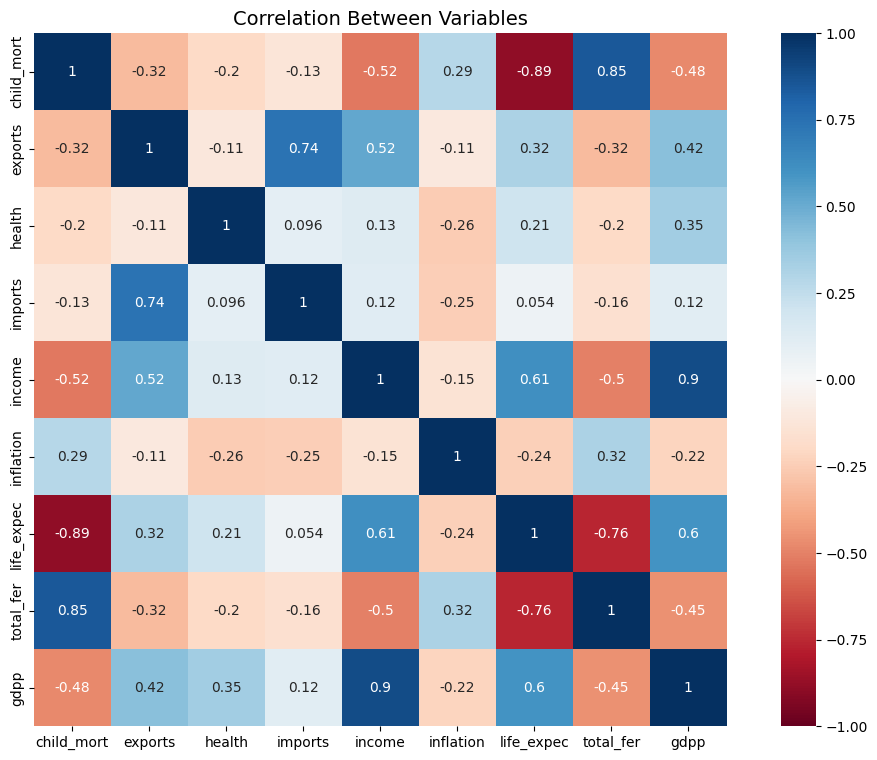

In [5]:
correlation_metrics=df.corr()
fig = plt.figure(figsize=(14,9))
sns.heatmap(correlation_metrics,square=True, annot=True, vmax=1, vmin=-1, cmap='RdBu')
plt.title('Correlation Between Variables', size=14)
plt.show()

#### As we can see, this map shows us the correlation between different variables. We can observe that income has a high correlation with gdpp, total_fert with child_mort and imports with exports. We can choose one of each pair to continue with the analysis. On the other hand, life_expec has a negative correlation with child_mort and total_fert (as expected)

In [30]:
df_cluster = df.drop(['exports', 'total_fer', 'imports'], axis='columns').reset_index()
df_cluster.drop('index', inplace=True, axis=1)
df_cluster

,country,child_mort,health,income,inflation,life_expec,gdpp
0,Afghanistan,90.2,7.58,1610,9.44,56.2,553
1,Albania,16.6,6.55,9930,4.49,76.3,4090
2,Algeria,27.3,4.17,12900,16.10,76.5,4460
3,Angola,119.0,2.85,5900,22.40,60.1,3530
4,Antigua and Barbuda,10.3,6.03,19100,1.44,76.8,12200
...,...,...,...,...,...,...,...
162,Vanuatu,29.2,5.25,2950,2.62,63.0,2970
163,Venezuela,17.1,4.91,16500,45.90,75.4,13500
164,Vietnam,23.3,6.84,4490,12.10,73.1,1310
165,Yemen,56.3,5.18,4480,23.60,67.5,1310


In [31]:
# Scaling the new data frame for clustering
sc = skp.StandardScaler()
data_scale = np.array(df_cluster[['child_mort', 'health', 'income', 'inflation', 'life_expec', 'gdpp']])
scaled = sc.fit_transform(data_scale.astype(float))
scaled_df = pd.DataFrame(scaled, columns=['child_mort', 'health', 'income', 'inflation', 'life_expec', 'gdpp'])
display(scaled_df)

,child_mort,health,income,inflation,life_expec,gdpp
0,1.291532,0.279088,-0.808245,0.157336,-1.619092,-0.679180
1,-0.538949,-0.097016,-0.375369,-0.312347,0.647866,-0.485623
2,-0.272833,-0.966073,-0.220844,0.789274,0.670423,-0.465376
3,2.007808,-1.448071,-0.585043,1.387054,-1.179234,-0.516268
4,-0.695634,-0.286894,0.101732,-0.601749,0.704258,-0.041817
...,...,...,...,...,...,...
162,-0.225578,-0.571711,-0.738527,-0.489784,-0.852161,-0.546913
163,-0.526514,-0.695862,-0.033542,3.616865,0.546361,0.029323
164,-0.372315,0.008877,-0.658404,0.409732,0.286958,-0.637754
165,0.448417,-0.597272,-0.658924,1.500916,-0.344633,-0.637754


<AxesSubplot:xlabel='income', ylabel='child_mort'>

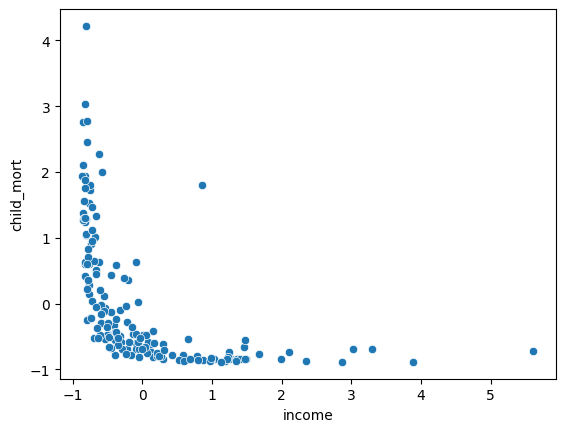

In [32]:
# To ensure that scaling the variables keeps the correlation
sns.scatterplot(data=scaled_df, x='income', y='child_mort')

## K-means

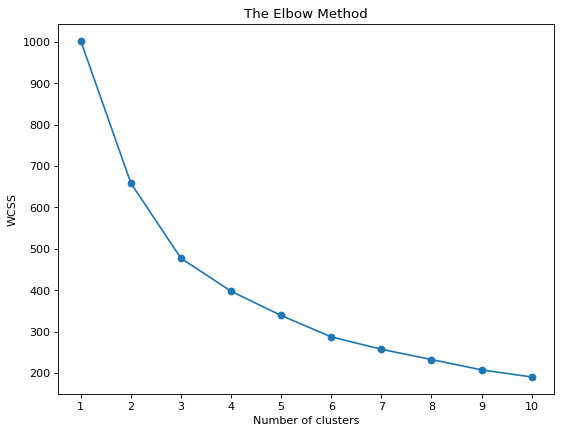

In [33]:
wcss=[]
k_range = range(1,11)
for i in k_range:
    kmeans = skc.KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
plt.plot(k_range, wcss, marker='o')

plt.xticks(k_range)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
# Clustering K Means, K=3
kmeans_3 = skc.KMeans(n_clusters=3,random_state=42)
kmeans_3.fit(scaled_df)
kmeans_3.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 0, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 1, 2, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0], dtype=int32)

In [35]:
# Assign clustering result to each country in the data frame
df_cluster['cluster_id'] = kmeans_3.labels_
df_cluster

,country,child_mort,health,income,inflation,life_expec,gdpp,cluster_id
0,Afghanistan,90.2,7.58,1610,9.44,56.2,553,0
1,Albania,16.6,6.55,9930,4.49,76.3,4090,2
2,Algeria,27.3,4.17,12900,16.10,76.5,4460,2
3,Angola,119.0,2.85,5900,22.40,60.1,3530,0
4,Antigua and Barbuda,10.3,6.03,19100,1.44,76.8,12200,2
...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,5.25,2950,2.62,63.0,2970,2
163,Venezuela,17.1,4.91,16500,45.90,75.4,13500,2
164,Vietnam,23.3,6.84,4490,12.10,73.1,1310,2
165,Yemen,56.3,5.18,4480,23.60,67.5,1310,0


In [36]:
df_cluster.cluster_id.value_counts(ascending=True)

1    31
0    49
2    87
Name: cluster_id, dtype: int64

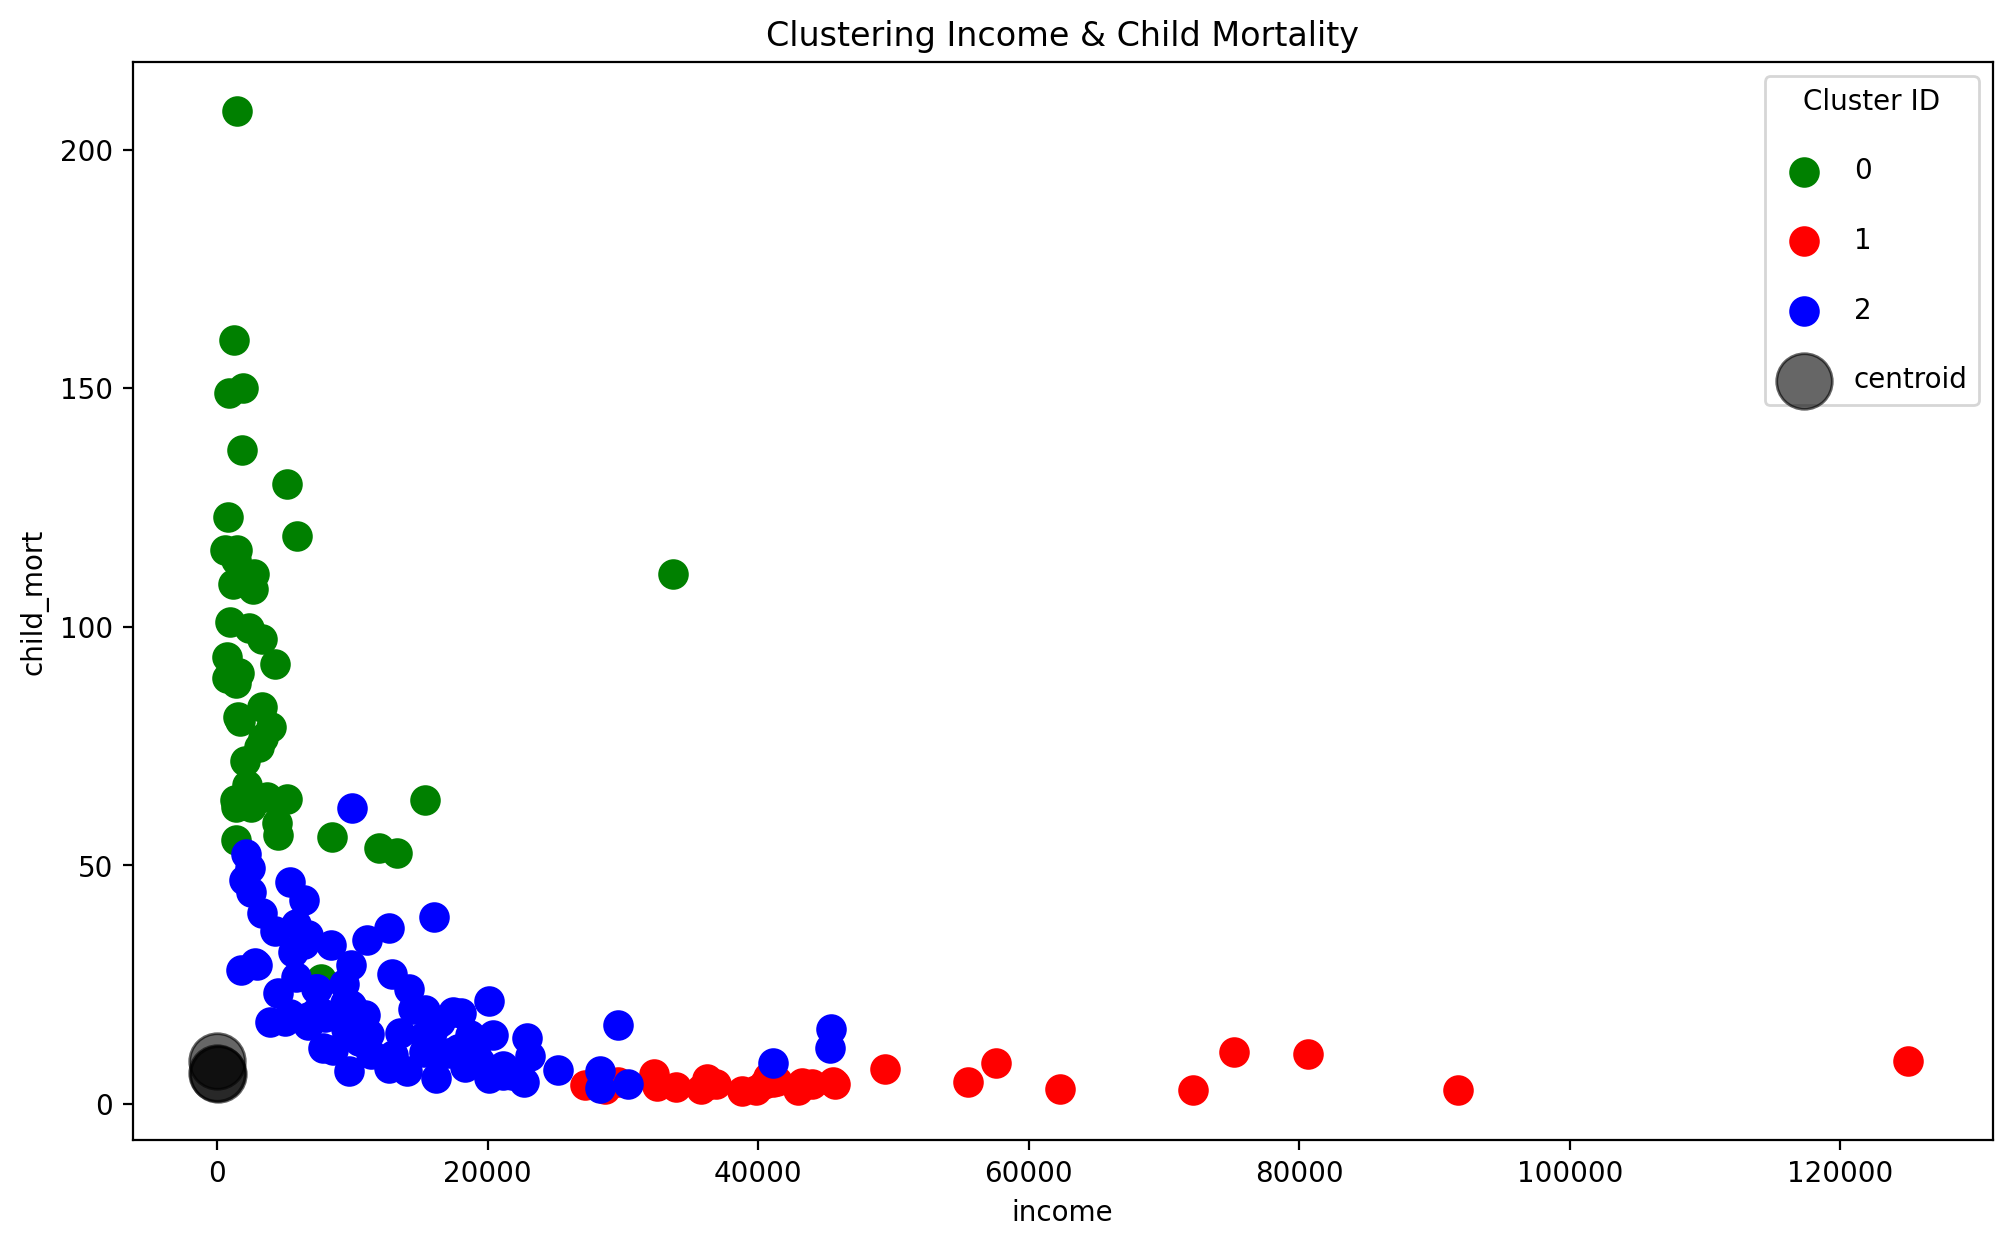

In [37]:
# Centroid Inverse Scaling
centroids_ori_scale = sc.inverse_transform(kmeans_3.cluster_centers_)

# Plot Clustering Result
fig, ax = plt.subplots(figsize=(12, 7), dpi=200)
plt.scatter(df_cluster.income[df_cluster.cluster_id == 0], df_cluster['child_mort'][df_cluster.cluster_id == 0], color = 'green', s=100, label= '0')
plt.scatter(df_cluster.income[df_cluster.cluster_id == 1], df_cluster['child_mort'][df_cluster.cluster_id == 1], color = 'red', s=100, label = '1')
plt.scatter(df_cluster.income[df_cluster.cluster_id == 2], df_cluster['child_mort'][df_cluster.cluster_id == 2], color = 'blue', s=100, label = '2')
ax.scatter(centroids_ori_scale[:, 0], centroids_ori_scale[:,1], c='black', s=400, marker='o', alpha=0.6, label = 'centroid')
plt.legend(title= "Cluster ID", labelspacing=1.5)
plt.xlabel('income')
plt.ylabel('child_mort')
plt.title("Clustering Income & Child Mortality")
plt.show()

## Identify the countries with lower income and higher child mortality

In [38]:
cluster0 = df_cluster[df_cluster.cluster_id == 0]
cluster0

,country,child_mort,health,income,inflation,life_expec,gdpp,cluster_id
0,Afghanistan,90.2,7.58,1610,9.440,56.2,553,0
3,Angola,119.0,2.85,5900,22.400,60.1,3530,0
17,Benin,111.0,4.10,1820,0.885,61.8,758,0
21,Botswana,52.5,8.30,13300,8.920,57.1,6350,0
25,Burkina Faso,116.0,6.74,1430,6.810,57.9,575,0
26,Burundi,93.6,11.60,764,12.300,57.7,231,0
28,Cameroon,108.0,5.13,2660,1.910,57.3,1310,0
31,Central African Republic,149.0,3.98,888,2.010,47.5,446,0
32,Chad,150.0,4.53,1930,6.390,56.5,897,0
36,Comoros,88.2,4.51,1410,3.870,65.9,769,0


,country,child_mort,health,income,inflation,life_expec,gdpp,cluster_id
0,"Congo, Dem. Rep.",116.0,7.91,609,20.80,57.5,334,0
1,Liberia,89.3,11.80,700,5.47,60.8,327,0
2,Burundi,93.6,11.60,764,12.30,57.7,231,0
3,Niger,123.0,5.16,814,2.55,58.8,348,0
4,Central African Republic,149.0,3.98,888,2.01,47.5,446,0
5,Mozambique,101.0,5.21,918,7.64,54.5,419,0
6,Malawi,90.5,6.59,1030,12.10,53.1,459,0
7,Guinea,109.0,4.93,1190,16.10,58.0,648,0
8,Togo,90.3,7.65,1210,1.18,58.7,488,0
9,Sierra Leone,160.0,13.10,1220,17.20,55.0,399,0


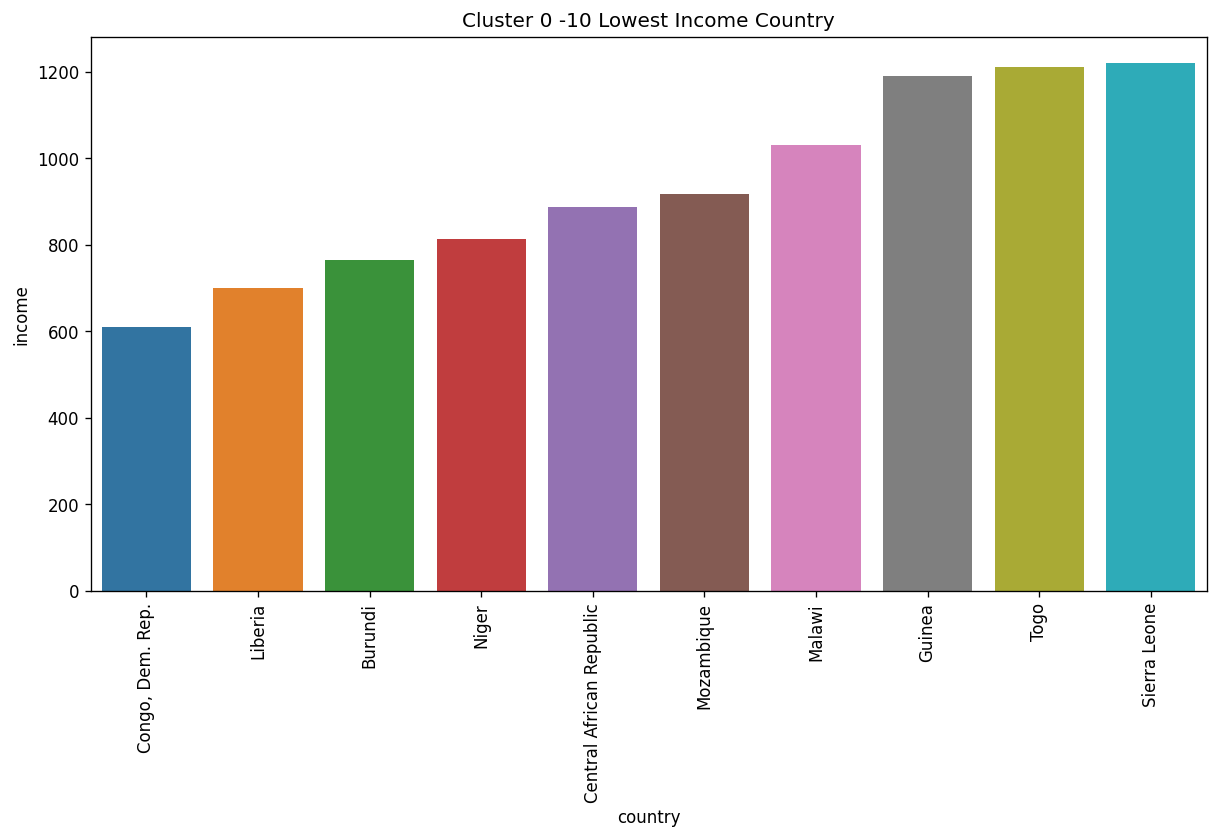

In [39]:
# Sort by lowest income
df_clust0_low_income = cluster0.sort_values('income').head(10).reset_index().drop('index', axis=1, inplace=False)
display(df_clust0_low_income)

# Visualize the sorted countries in a bar chart
fig, ax = plt.subplots(figsize=(12, 6), dpi=120)
sns.barplot(x=df_clust0_low_income.country, y=df_clust0_low_income.income)
ax.set_xticklabels(df_clust0_low_income.country, rotation = 90)    
plt.title('Cluster 0 -10 Lowest Income Country')
plt.show()

,country,child_mort,health,income,inflation,life_expec,gdpp,cluster_id
0,Haiti,208.0,6.91,1500,5.45,32.1,662,0
1,Sierra Leone,160.0,13.10,1220,17.20,55.0,399,0
2,Chad,150.0,4.53,1930,6.39,56.5,897,0
3,Central African Republic,149.0,3.98,888,2.01,47.5,446,0
4,Mali,137.0,4.98,1870,4.37,59.5,708,0
5,Nigeria,130.0,5.07,5150,104.00,60.5,2330,0
6,Niger,123.0,5.16,814,2.55,58.8,348,0
7,Angola,119.0,2.85,5900,22.40,60.1,3530,0
8,Burkina Faso,116.0,6.74,1430,6.81,57.9,575,0
9,"Congo, Dem. Rep.",116.0,7.91,609,20.80,57.5,334,0


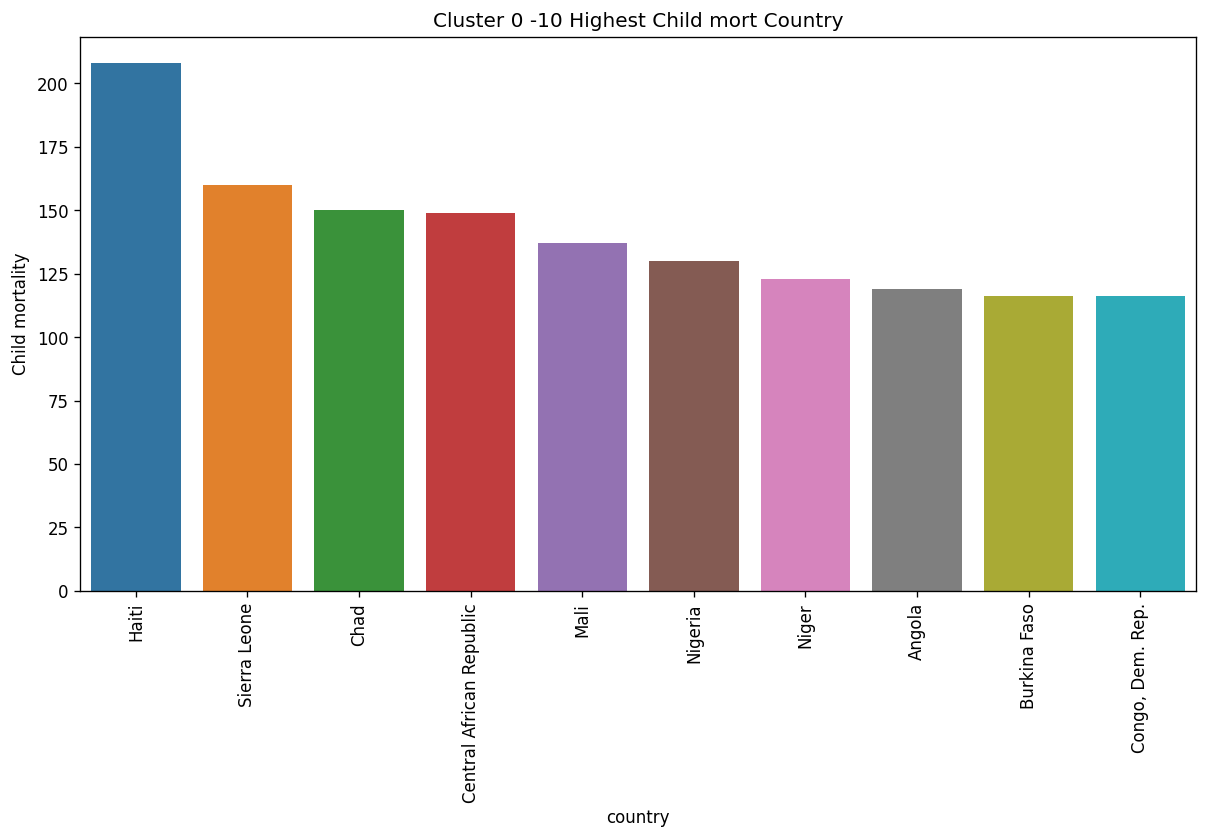

In [46]:
df_clust0_child = cluster0.sort_values('child_mort', ascending=False).head(10).reset_index().drop('index', axis=1, inplace=False)
display(df_clust0_child)

# Visualize the sorted countries in a bar chart
fig, ax = plt.subplots(figsize=(12, 6), dpi=120)
sns.barplot(x=df_clust0_child.country, y=df_clust0_child.child_mort)
ax.set_xticklabels(df_clust0_child.country, rotation = 90)    
plt.title('Cluster 0 -10 Highest Child mort Country')
plt.ylabel('Child mortality')
plt.show()

In [44]:
def common_elements(list1, list2):
    result = []
    for element in list1:
        if element in list2:
            result.append(element)
    print(result)

In [45]:
low_inc = df_clust0_low_income.country.unique()
high_mort = df_clust0_child.country.unique()
common_elements(low_inc, high_mort)

['Congo, Dem. Rep.', 'Niger', 'Central African Republic', 'Sierra Leone']


## As a conclusion, if an NGO would like to target their resources to some countries, I would suggest them to choose from cluster 0, specifically in countries that share a low income and a high child mortality: Congo, Niger, Central African Reprublic and Sierra Leone